In [1]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("advertising.csv")

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**their is no null value**

In [6]:
df.duplicated().any()

False

**their is duplicate value**

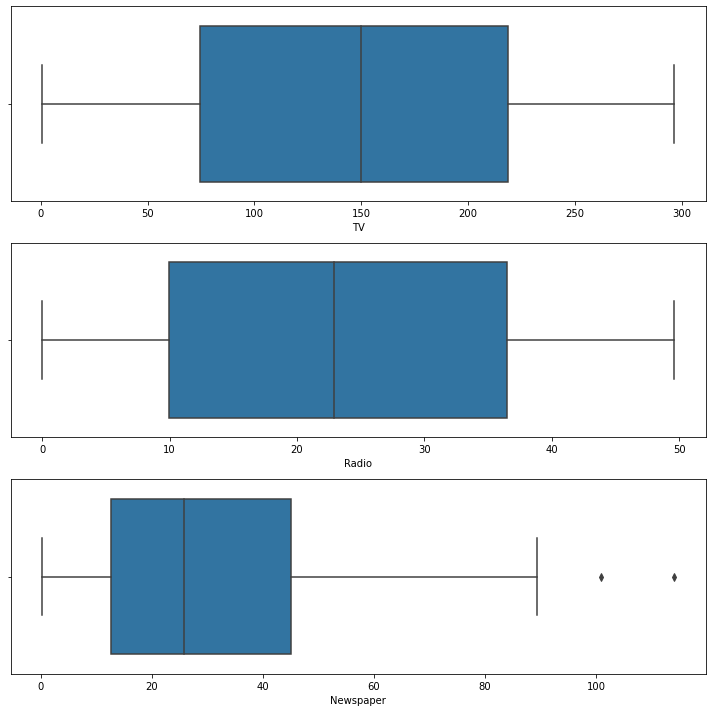

In [7]:
fig,axes = plt.subplots(3,figsize=(10,10))

pl1 =sns.boxplot(x='TV',data=df,ax=axes[0])
pl2 =sns.boxplot(x='Radio',data=df,ax=axes[1])
pl3 =sns.boxplot(x='Newspaper',data=df,ax=axes[2])

plt.tight_layout()

### conclusion 
* From the fig it is clear that feature : Radio,Tv has not outliers since no points present beyond the whiskers


* From the fig it is clear that feature : NewsPaper has 2  outliers since 2 points present beyond the whiskers


* Out of 200 observation only 2 outliers present so their no is very small hence their effect can be neglected on the ML model



<AxesSubplot:xlabel='Sales', ylabel='Density'>

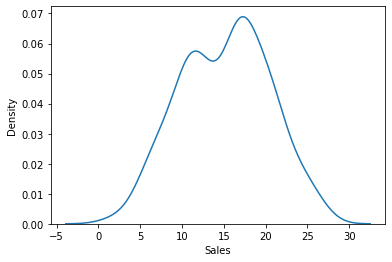

In [8]:
sns.kdeplot(df.Sales)

C:\Users\RAHUL SUTHAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

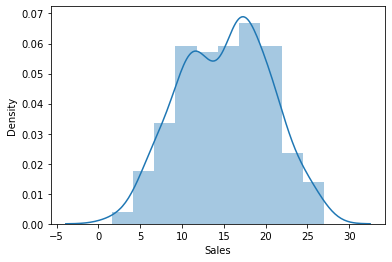

In [9]:
sns.distplot(df.Sales)

**From the fig it can clearly seen that the data is symtrical about the mean , which implies that the data is almost normaly distrubuted and hence we can fit a Linear regression model on it**

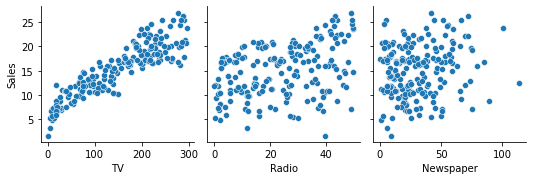

In [10]:

sns.pairplot(data=df,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'])
plt.show()

**Tv and sales the strong Linear relation then Radio and newspaper**

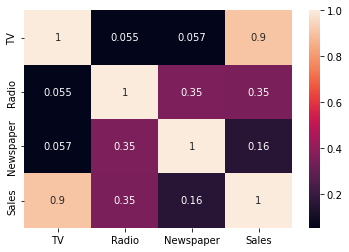

In [11]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [12]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [13]:
# linear model 
reg = LinearRegression()

In [14]:
x_tv = pd.DataFrame(df.TV)
y_sales = pd.DataFrame(df.Sales)

In [15]:
reg.fit(x_tv,y_sales)

LinearRegression()

In [50]:
reg.score(x_tv,y_sales)*100

81.21757029987414

In [17]:
m=reg.coef_
c=reg.intercept_
print(m,c)

[[0.05546477]] [6.97482149]


In [18]:
df_tv = df.copy()

In [19]:
df_tv['predicated']  = m*df_tv[['TV']]+c
df_tv['E1'] =( df_tv['Sales']-df_tv['predicated'])**2
df_tv['E2'] =(df_tv['Sales']-df_tv['Sales'].mean())**2
df_tv

,TV,Radio,Newspaper,Sales,predicated,E1,E2
0,230.1,37.8,69.2,22.1,19.737265,5.582516,48.57393
1,44.5,39.3,45.1,10.4,9.443004,0.915842,22.37763
2,17.2,45.9,69.3,12.0,7.928816,16.574543,9.80003
3,151.5,41.3,58.5,16.5,15.377734,1.259480,1.87553
4,180.8,10.8,58.4,17.9,17.002852,0.804875,7.67013
...,...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,9.093576,2.230768,56.70843
196,94.2,4.9,8.1,14.0,12.199603,3.241430,1.27803
197,177.0,9.3,6.4,14.8,16.792086,3.968406,0.10923
198,283.6,42.0,66.2,25.5,22.704630,7.814091,107.52653


In [20]:
r2 =1-( df_tv['E1'].sum()/df_tv['E2'].sum())
r2

0.8121757029987414

### conclusion 
Linear regreesion Machine Learning model create between **Tv-data** and **Sales-data** 
we got approx **81.21% r2 score** which is greate accuracy so we can say that sales is dependent on tv-advertisement 

In [21]:
reg2 = LinearRegression()


In [22]:
x_radio = pd.DataFrame(df.Radio)

In [23]:
reg2.fit(x_radio,y_sales)

LinearRegression()

In [24]:
reg2.score(x_radio,y_sales)

0.1222419039947863

### conclusion
Sales is least depends upon **radio-adverstiment** because **r2_score** of this regression model is **12.22 %** 

In [25]:
reg3 =LinearRegression()

In [26]:
x_newspaper = pd.DataFrame(df.Newspaper)
reg3.fit(x_newspaper,y_sales)

LinearRegression()

In [27]:
reg3.score(x_newspaper,y_sales)

0.024951369862864836

### conclusion
Sales is not depends upon **newspaper-adverstiment** because **r2_score** of this regression model is **02.49 %** which very low 

### overall conclusion
Sales Are most dependent upon **TV Advertiment** becuase  their r2 score is very much high and good for future predicti

In [28]:
from sklearn.model_selection import train_test_split

In [71]:
x =  df[['TV','Radio','Newspaper']]
y = df[['Sales']]


In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

In [31]:
model = LinearRegression()

In [32]:
model.fit(x_train,y_train)

LinearRegression()

In [75]:
list(zip(x,model.coef_[0]))

[('TV', 0.05382910866725005),
 ('Radio', 0.11001224388558058),
 ('Newspaper', 0.0062899501461303325)]

In [65]:
coef =model.coef_[0]

In [34]:
model.intercept_

array([4.33459586])

In [67]:
#Multiple linear eq
print("equation = {:.2f}*TV+{:.2f}*Radio+{:.2f}*Newspaper + {:.2f}".format(coef[0],coef[1],coef[2],model.intercept_[0]))

equation = 0.05*TV+0.11*Radio+0.01*Newspaper + 4.33


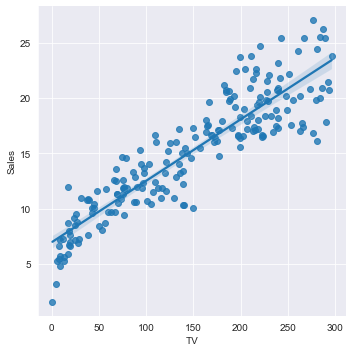

In [35]:
sns.set_style('darkgrid')

sns.lmplot(x='TV',y='Sales',data=df)

**From above diagram we can see that Tv data and Sales that has good linear relation and model is good fit with tv data**

In [36]:
from sklearn.metrics import r2_score

## Predication on train data

In [49]:
y_pred= model.predict(x_train)


In [38]:
r2_score(y_train,y_pred)

0.91049938193816

**r2_score of above model with corresponding to train data is good so we can say above model r2_score is 91.04%** 

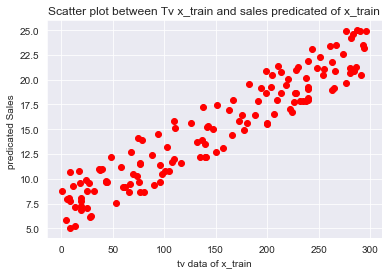

In [39]:
plt.scatter(x=x_train.TV,y=y_pred,color='r')
plt.xlabel("tv data of x_train")
plt.ylabel("predicated Sales ")
plt.title("Scatter plot between Tv x_train and sales predicated of x_train")
plt.show()

**Above plot show that predicated value of Sales are dependent upon tv-data value mostly and tv-data value is linear to predicted value .using the tv data we can get near to correct predicated value mostly**

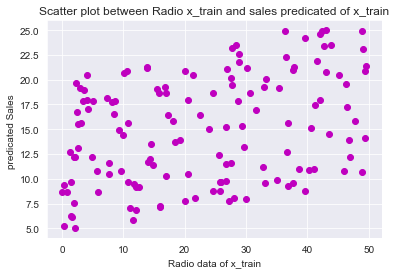

In [40]:
plt.scatter(x=x_train.Radio,y=y_pred,color='m')
plt.xlabel("Radio data of x_train")
plt.ylabel("predicated Sales ")
plt.title("Scatter plot between Radio x_train and sales predicated of x_train")
plt.show()

**Above plot show that predicated value of Sales are not  dependent upon Radio-data value mostly and Radio-data value is not linear to predicted value and not any other relation between them so using only radio value we moslty don't get predicated correct**

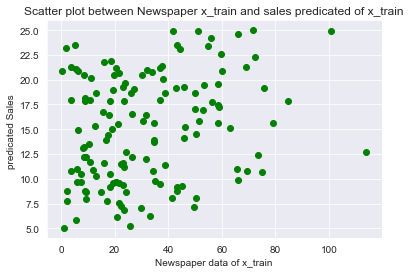

In [41]:
plt.scatter(x=x_train.Newspaper,y=y_pred,color='g')
plt.xlabel("Newspaper data of x_train")
plt.ylabel("predicated Sales ")
plt.title("Scatter plot between Newspaper x_train and sales predicated of x_train")
plt.show()

**Above plot show that predicated value of Sales are not  dependent upon Newspaper-data value mostly and Newspaper-data value is not linear to predicted value and not any other relation between them so using only Newspaper value we moslty don't get predicated**

## predication on Test data
**Test data is data on which model is not train but similar type of data use for training**

In [42]:
y_pred_test = model.predict(x_test)

In [43]:
r2_score(y_test,y_pred_test)

0.8655979373420271

**R2_score of model for test data is 86% which also a good and error of this model is less**

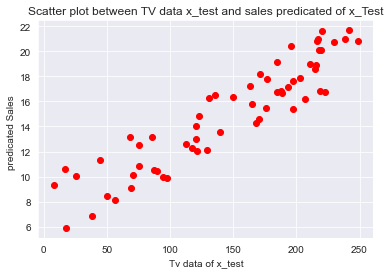

In [44]:
plt.scatter(x=x_test.TV,y=y_pred_test,color='r')
plt.xlabel("Tv data of x_test")
plt.ylabel("predicated Sales  ")
plt.title("Scatter plot between TV data x_test and sales predicated of x_Test")
plt.show()

**Above plot show that predicated value of Sales for test data are dependent upon tv-data value mostly and tv-data value is linear to predicted value .using the tv data we can get near to correct predicated value mostly**

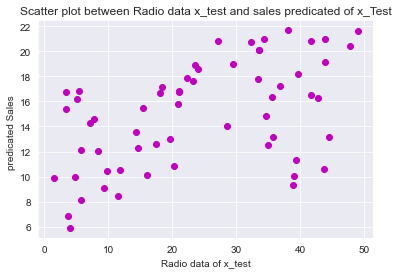

In [45]:
plt.scatter(x=x_test.Radio,y=y_pred_test,color='m')
plt.xlabel("Radio data of x_test")
plt.ylabel("predicated Sales  ")
plt.title("Scatter plot between Radio data x_test and sales predicated of x_Test")
plt.show()

**for test dataAbove plot show that predicated value of Sales are not  dependent upon Radio-data value mostly and Radio-data value is not linear to predicted value and not any other relation between them so using only radio value we moslty don't get predicated sales correct**

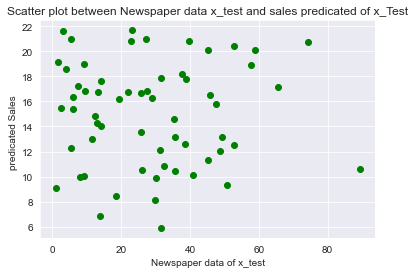

In [46]:
plt.scatter(x=x_test.Newspaper,y=y_pred_test,color='g')
plt.xlabel("Newspaper data of x_test")
plt.ylabel("predicated Sales  ")
plt.title("Scatter plot between Newspaper data x_test and sales predicated of x_Test")
plt.show()

**for test data Above plot show that predicated value of Sales are not  dependent upon Newspaper-data value mostly and Newspaper-data value is not linear to predicted value and not any other relation between them so using only Newspaper value we moslty don't get predicated sales correct**

## conclusion
 **Above analysis and model we can say that sales value mostly depends upon tv advertisement data but when we build
 model for TV,Radio,Newspaper separated we get r2_Score for Tv highest 81% which is pretty good but when we build
 a model which uses all 3 features data then our model accuracy increases it may between 86-90%.
 so we can say that TV data may most impact but radio,newspaper data can help us to improve accuracy of our model** 
